In [1]:
from visualisation_data import *
from mesure_conso import *
from utils import *

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Récupération de données brutes
Données provenant du multimètre ou de l'énergimètre

In [24]:
# données du multimètre
data_multi = pd.read_csv('../Res/EXP12/UM25C_22_charge.csv',sep=',')

In [25]:
data_multi.head(5)

date            heure  conso-Ah  conso-Wh  tension  intensite  \
0  2022-05-21  08:03:46.768397       0.0       0.0     4.96        0.0   
1  2022-05-21  08:03:48.048469       0.0       0.0     4.96        0.0   
2  2022-05-21  08:03:49.299693       0.0       0.0     4.96        0.0   
3  2022-05-21  08:03:50.578428       0.0       0.0     4.96        0.0   
4  2022-05-21  08:03:51.829810       0.0       0.0     4.96        0.0   

   puissance  resistance  
0        0.0      9999.9  
1        0.0      9999.9  
2        0.0      9999.9  
3        0.0      9999.9  
4        0.0      9999.9

In [26]:
# données de l'énergimètre
data_energ = pd.read_csv('../Res/energimetre/4_RPI_sans_chache_sans_services.csv',skiprows=5)
data_energ_clean = cleanDataEnergimetre(data_energ)

In [27]:
data_energ_clean.head(5)

secondes     heure  intensite   tension  puissance
0  0.000000  0.000000  -0.002800  0.000809  -0.000002
1  0.100004  0.000028  -0.002805  0.000875  -0.000002
2  0.200008  0.000056   0.048037  4.432360   0.212918
3  0.300012  0.000083   0.062925  4.996450   0.314403
4  0.400016  0.000111   0.040921  4.996620   0.204465

# Visualisation des données

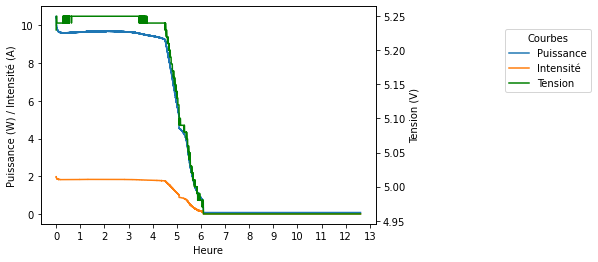

In [28]:
# Mulitmètre : plot Superposé des grandeurs
plotSuperpose(data_multi)

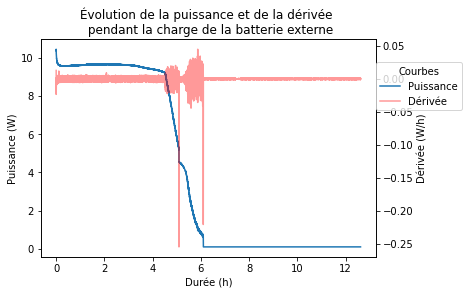

In [29]:
# Multimètre : graphique de puissance avec dérivée
plotPuissance(data_multi,
              derive=True,
              titre='Évolution de la puissance et de la dérivée \n pendant la charge de la batterie externe')

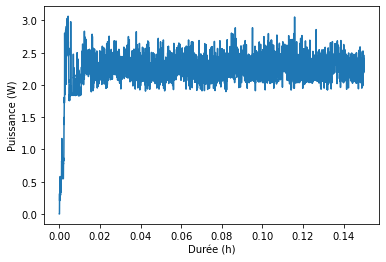

In [15]:
# Énergimètre : plot de puissance
plotPuissance(data_energ_clean,formatted=True)

# Récupération des points remarquables
Valide seulement pour les données de charge car il n'y a pas de points remarquables sur les courbes de recharge

In [37]:
# récupération des durées d'expériences à laquelle les pts remarquables apparaissent dans une liste
pts_remarq = findEndPoints(data_multi)
print(' 1er point : ',pts_remarq[0],'h','\n','2e point : ',pts_remarq[1],'h')

 1er point :  5.089766293333334 h 
 2e point :  6.0969817016666665 h


# Consommation énergétique

Valide pour des données de charge provenant du multimètre (avec les valeurs de dérivées)

In [40]:
# Récupération de la dernière valeur de consommation mesurée par le multimère
print('Consommation mesurée par le multimètre :',getConso_Multimetre(data_multi),'Wh')

Consommation mesurée par le multimètre : 50.543 Wh


In [48]:
# Calcul de la consommmation avec la méthode des rectangles pour les données de multimètre
print('Conso jusqu\'au premier point remarquable :',getConso_Rectangles(data_multi,n_point=1),'Wh',
     '\nConso jusqu\'au deuxième pt remarquable :',getConso_Rectangles(data_multi,n_point=2),'Wh',
      '\nConso jusqu\'à la fin de l\'expérience :',getConso_Rectangles(data_multi),'Wh'
     )

Conso jusqu'au premier point remarquable : 47.42156950999362 Wh 
Conso jusqu'au deuxième pt remarquable : 49.99753234212723 Wh 
Conso jusqu'à la fin de l'expérience : 50.59313853148181 Wh


In [51]:
# Consommation sur des données d'énergimètre : 
print('Consommation pour une expérience énergimètre:',getConso_Rectangles(data_energ_clean,formatted=True),'Wh')

Consommation pour une expérience énergimètre: 0.3352852275047373 Wh
